In [21]:
from pyquil import Program, get_qc
from pyquil.gates import *

def throw_octahedral_die():
    program = Program()
    program += H(0)
    program += H(1)
    program += H(2)
    qc = get_qc('3q-qvm')
    bits = qc.run_and_measure(program, trials=1)
    return 1 + bits[0][0] + 2 * bits[1][0] + 4 * bits[2][0]
[throw_octahedral_die() for i in range(15)]

[8, 6, 5, 4, 3, 3, 4, 2, 5, 7, 2, 6, 7, 8, 5]

In [58]:
from pyquil import Program, get_qc
from pyquil.gates import *
import math

def throw_polyhedral_die(num_sides):
    program = Program()
    program += H(0)
    program += H(1)
    program += H(2)
    n = int(math.log(num_sides - 1, 2)) + 1
    qc = get_qc('3q-qvm')
    t = num_sides + 1
    x = 0
    while t > num_sides:
        bits = qc.run_and_measure(program, trials=int((n+2)/3))
        x += int((n+2)/3)
        t = 1
        f = 1
        for i in range(n):
            if bits[i%3][int(i/3)]:
                t += f
            f *= 2
    return (t, x)
[throw_polyhedral_die(9999) for i in range(2, 15)]

[(3226, 10),
 (4659, 5),
 (9519, 5),
 (8410, 5),
 (7426, 10),
 (3045, 5),
 (8414, 10),
 (8535, 5),
 (6361, 10),
 (5296, 15),
 (8791, 5),
 (4365, 5),
 (6897, 15)]

In [62]:
from pyquil import Program, get_qc
from pyquil.gates import *
import math

def throw_polyhedral_die(num_sides):
    program = Program()
    program += H(0)
    program += H(1)
    program += H(2)
    qc = get_qc('3q-qvm')
    x = 0
    t = 0
    f = num_sides / 2
    while int(t) + 1 < t + f:
        bits = qc.run_and_measure(program, trials=1)
        x += 1
        for i in range(3):
            if bits[i][0]:
                t += f
            f /= 2
    return (int(t), x)
[throw_polyhedral_die(9999) for i in range(2, 15)]

[(6154, 5),
 (5784, 5),
 (8620, 5),
 (4059, 5),
 (7488, 5),
 (3688, 6),
 (7504, 5),
 (8925, 5),
 (6532, 5),
 (7230, 5),
 (1466, 5),
 (8846, 5),
 (9148, 6)]

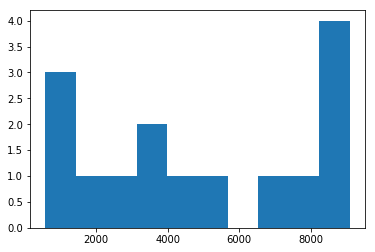

In [72]:
from pyquil import Program, get_qc
from pyquil.gates import *
import math

class dice:
    def __init__(self):
        self._program = Program()
        self._program += H(0)
        self._program += H(1)
        self._program += H(2)
        self._qc = get_qc('3q-qvm')
    def _get_bits(self, trials):
        return self._qc.run_and_measure(self._program, trials=trials)
    def throw_polyhedral_die(self, num_sides):
        x = 0
        t = 0
        f = num_sides / 2
        while int(t) + 1 < t + f:
            bits = self._get_bits(1)
            x += 1
            for _i, bit in bits.items():
                if bit[0]:
                    t += f
                f /= 2
        return int(t)
d = dice()
d1 = [d.throw_polyhedral_die(9999) for i in range(15)]

%matplotlib inline
from matplotlib import pyplot as plt
h = plt.hist(d1)
